In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/balikesir-weather/LTBF.01.01.2019.14.12.2021.1.0.0.tr.utf8.00000000.csv
/kaggle/input/enerjisa-uretim-hackathon/power.csv
/kaggle/input/enerjisa-uretim-hackathon/sample_submission.csv
/kaggle/input/enerjisa-uretim-hackathon/features.csv
/kaggle/input/enerjisa-uretim-hackathon/feature_units.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#close warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
power = pd.read_csv("../input/enerjisa-uretim-hackathon/power.csv", parse_dates=["Timestamp"])
features = pd.read_csv("../input/enerjisa-uretim-hackathon/features.csv", parse_dates=["Timestamp"])
weather = pd.read_csv("../input/balikesir-weather/LTBF.01.01.2019.14.12.2021.1.0.0.tr.utf8.00000000.csv",header = None)
#downloaded from https://rp5.ru/Bal%C4%B1kesir_kentine_ait_hava_durumu_ar%C5%9Fivi_(METAR)

Location of wind turbines of EnerjiSA is Balıkesir.

In [4]:
weather.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,"# Meteoroloji istasyonu Balıkesir, Türkiye, ME...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,# Kodlama: UTF-8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"# Veriler ""Rasat Portalı"" rp5.ru WEB sitesi ta...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,# Lütfen verileri kullandığınızda sitemizin ad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,# Meteoroloji işaretlerinin anlamları için: ht...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,#,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Yerel zaman Balıkesir kentine ait,T,P0,P,U,DD,Ff,ff10,WW,W'W',c,VV,Td
7,14.12.2021 23:50,10.0,751.3,760.5,82,Rüzgar kuzey-kuzeydoğu yönünden esiyor,8,NaN,NaN,NaN,"Dağınık bulutluluk (40-50%) 450 m, dağınık bul...",10.0 ve üstü,7.0
8,14.12.2021 22:50,10.0,751.3,760.5,88,Rüzgar kuzey-kuzeydoğu yönünden esiyor,11,NaN,NaN,NaN,"Dağınık bulutluluk (40-50%) 450 m, dağınık bul...",10.0 ve üstü,8.0
9,14.12.2021 21:50,10.0,750.5,759.7,88,Rüzgar kuzey-kuzeydoğu yönünden esiyor,10,16,NaN,NaN,"Dağınık bulutluluk (40-50%) 450 m, dağınık bul...",10.0 ve üstü,8.0


Fixing weather of Balıkesir dataset

In [5]:
weather = weather.iloc[6:]

In [6]:
weather.columns = weather.iloc[0]

In [7]:
weather = weather.iloc[1: , :]
weather.head(10)

6,Yerel zaman Balıkesir kentine ait,T,P0,P,U,DD,Ff,ff10,WW,W'W',c,VV,Td
7,14.12.2021 23:50,10.0,751.3,760.5,82,Rüzgar kuzey-kuzeydoğu yönünden esiyor,8,NaN,NaN,NaN,"Dağınık bulutluluk (40-50%) 450 m, dağınık bul...",10.0 ve üstü,7.0
8,14.12.2021 22:50,10.0,751.3,760.5,88,Rüzgar kuzey-kuzeydoğu yönünden esiyor,11,NaN,NaN,NaN,"Dağınık bulutluluk (40-50%) 450 m, dağınık bul...",10.0 ve üstü,8.0
9,14.12.2021 21:50,10.0,750.5,759.7,88,Rüzgar kuzey-kuzeydoğu yönünden esiyor,10,16,NaN,NaN,"Dağınık bulutluluk (40-50%) 450 m, dağınık bul...",10.0 ve üstü,8.0
10,14.12.2021 20:50,11.0,750.5,759.7,88,Rüzgar kuzey-kuzeydoğu yönünden esiyor,7,NaN,NaN,NaN,"Dağınık bulutluluk (40-50%) 450 m, dağınık bul...",10.0 ve üstü,9.0
11,14.12.2021 19:50,11.0,750.5,759.7,88,Rüzgar kuzey-kuzeydoğu yönünden esiyor,6,NaN,NaN,NaN,"Çok az bulutluluk (10-30%) 450 m, dağınık bulu...",10.0 ve üstü,9.0
12,14.12.2021 18:50,12.0,750.6,759.7,82,Rüzgar kuzey-kuzeydoğu yönünden esiyor,5,NaN,NaN,NaN,"Çok az bulutluluk (10-30%) 510 m, dağınık bulu...",10.0 ve üstü,9.0
13,14.12.2021 17:50,12.0,749.9,759.0,82,Rüzgar kuzeyden esiyor,5,NaN,NaN,NaN,"Çok az bulutluluk (10-30%) 600 m, dağınık bulu...",10.0 ve üstü,9.0
14,14.12.2021 16:50,12.0,749.9,759.0,82,Rüzgar kuzeyden esiyor,4,NaN,NaN,NaN,"Çok az bulutluluk (10-30%) 600 m, dağınık bulu...",10.0 ve üstü,9.0
15,14.12.2021 15:50,11.0,749.8,759.0,88,Değişken rüzgar yönü,1,NaN,NaN,NaN,"Çok az bulutluluk (10-30%) 600 m, dağınık bulu...",10.0 ve üstü,9.0
16,14.12.2021 14:50,13.0,749.9,759.0,77,Rüzgar güneybatıdan esiyor,2,NaN,NaN,NaN,"Çok az bulutluluk (10-30%) 450 m, dağınık bulu...",10.0 ve üstü,9.0


In [8]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26765 entries, 7 to 26771
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Yerel zaman Balıkesir kentine ait  26765 non-null  object
 1   T                                  26762 non-null  object
 2   P0                                 26762 non-null  object
 3   P                                  26765 non-null  object
 4   U                                  26762 non-null  object
 5   DD                                 26764 non-null  object
 6   Ff                                 26764 non-null  object
 7   ff10                               291 non-null    object
 8   WW                                 4218 non-null   object
 9   W'W'                               947 non-null    object
 10  c                                  26765 non-null  object
 11  VV                                 26765 non-null  object
 12  Td  

In [9]:
#convert data type to datetime
weather["Yerel zaman Balıkesir kentine ait"] = pd.to_datetime(weather["Yerel zaman Balıkesir kentine ait"])

In [10]:
weather.describe(include = 'object')

6,T,P0,P,U,DD,Ff,ff10,WW,W'W',c,VV,Td
count,26762,26762,26765,26762,26764,26764,291,4218,947,26765,26765,26762
unique,53,297,51,78,18,18,18,38,13,405,47,37
top,8.0,752.4,761.2,100,"Rüzgarsız, durgun",0,15,"Hafif sağanak, yağmur","Sağanak, yağmur",Kayda değer bir bulutlanma yok,10.0 ve üstü,15.0
freq,1127,349,1974,3087,7756,7756,50,1687,712,11501,23251,1586


In [11]:
weather.info()
#DD is wind direction
##Ff is wind speed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26765 entries, 7 to 26771
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Yerel zaman Balıkesir kentine ait  26765 non-null  datetime64[ns]
 1   T                                  26762 non-null  object        
 2   P0                                 26762 non-null  object        
 3   P                                  26765 non-null  object        
 4   U                                  26762 non-null  object        
 5   DD                                 26764 non-null  object        
 6   Ff                                 26764 non-null  object        
 7   ff10                               291 non-null    object        
 8   WW                                 4218 non-null   object        
 9   W'W'                               947 non-null    object        
 10  c                                 

In [12]:
#handling datetime
df_copy = weather.copy()
df_copy['date'] = df_copy["Yerel zaman Balıkesir kentine ait"]
df_copy['hour'] = df_copy['date'].dt.hour
df_copy['month'] = df_copy['date'].dt.month
df_copy['year'] = df_copy['date'].dt.year
df_copy['dayofmonth'] = df_copy['date'].dt.day

dates = df_copy[['hour','month','year','dayofmonth']]

weather = pd.concat([weather.drop(["Yerel zaman Balıkesir kentine ait"],axis=1), dates], axis=1)
weather.drop(['T','P0','P0','U',"ff10","WW","W'W'","c","VV","Td",'P'],axis=1,inplace=True)

#wind speed col to numeric
weather['Ff'] = pd.to_numeric(weather['Ff'],errors = 'coerce')
#Take 1 data from every hour.
weather=weather.loc[weather['hour'].shift() != weather['hour']]
weather

6,DD,Ff,hour,month,year,dayofmonth
7,Rüzgar kuzey-kuzeydoğu yönünden esiyor,8.0,23,12,2021,14
8,Rüzgar kuzey-kuzeydoğu yönünden esiyor,11.0,22,12,2021,14
9,Rüzgar kuzey-kuzeydoğu yönünden esiyor,10.0,21,12,2021,14
10,Rüzgar kuzey-kuzeydoğu yönünden esiyor,7.0,20,12,2021,14
11,Rüzgar kuzey-kuzeydoğu yönünden esiyor,6.0,19,12,2021,14
...,...,...,...,...,...,...
26767,Rüzgar kuzeyden esiyor,4.0,4,1,2019,1
26768,Rüzgar kuzeyden esiyor,2.0,3,1,2019,1
26769,Rüzgar kuzey-kuzeydoğu yönünden esiyor,1.0,2,1,2019,1
26770,"Rüzgarsız, durgun",0.0,1,1,2019,1


In [13]:
weather.isnull().sum().sort_values()

6
hour          0
month         0
year          0
dayofmonth    0
DD            1
Ff            1
dtype: int64

In [14]:
#fill NaNs
weather = weather.fillna(weather.median())
weather = weather.apply(lambda x: x.fillna(x.value_counts().index[0]))
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25802 entries, 7 to 26771
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DD          25802 non-null  object 
 1   Ff          25802 non-null  float64
 2   hour        25802 non-null  int64  
 3   month       25802 non-null  int64  
 4   year        25802 non-null  int64  
 5   dayofmonth  25802 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 1.4+ MB


In [15]:
#encoding inordered wind direction column
ruzgaryonu = weather[["DD"]]
ruzgaryonu = pd.get_dummies(ruzgaryonu)

In [16]:
#concatinate encoded df
weather= pd.concat([ruzgaryonu,weather],axis=1)
weather

,DD_Değişken rüzgar yönü,DD_Rüzgar batı-güneybatı yönünden esiyor,DD_Rüzgar batı-kuzeybatı yönünden esiyor,DD_Rüzgar batıdan esiyor,DD_Rüzgar doğu-güneydoğu yönünden esiyor,DD_Rüzgar doğu-kuzeydoğu yönünden esiyor,DD_Rüzgar doğudan esiyor,DD_Rüzgar güney-güneybatı yönünden esiyor,DD_Rüzgar güney-güneydoğu yönünden esiyor,DD_Rüzgar güneybatıdan esiyor,...,DD_Rüzgar kuzeybatıdan esiyor,DD_Rüzgar kuzeyden esiyor,DD_Rüzgar kuzeydoğudan esiyor,"DD_Rüzgarsız, durgun",DD,Ff,hour,month,year,dayofmonth
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,Rüzgar kuzey-kuzeydoğu yönünden esiyor,8.0,23,12,2021,14
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,Rüzgar kuzey-kuzeydoğu yönünden esiyor,11.0,22,12,2021,14
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,Rüzgar kuzey-kuzeydoğu yönünden esiyor,10.0,21,12,2021,14
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,Rüzgar kuzey-kuzeydoğu yönünden esiyor,7.0,20,12,2021,14
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,Rüzgar kuzey-kuzeydoğu yönünden esiyor,6.0,19,12,2021,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26767,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,Rüzgar kuzeyden esiyor,4.0,4,1,2019,1
26768,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,Rüzgar kuzeyden esiyor,2.0,3,1,2019,1
26769,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,Rüzgar kuzey-kuzeydoğu yönünden esiyor,1.0,2,1,2019,1
26770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,"Rüzgarsız, durgun",0.0,1,1,2019,1


In [17]:
#drop old wind dir col
weather.drop(['DD'],axis=1,inplace=True)

In [18]:
weather.describe()

,DD_Değişken rüzgar yönü,DD_Rüzgar batı-güneybatı yönünden esiyor,DD_Rüzgar batı-kuzeybatı yönünden esiyor,DD_Rüzgar batıdan esiyor,DD_Rüzgar doğu-güneydoğu yönünden esiyor,DD_Rüzgar doğu-kuzeydoğu yönünden esiyor,DD_Rüzgar doğudan esiyor,DD_Rüzgar güney-güneybatı yönünden esiyor,DD_Rüzgar güney-güneydoğu yönünden esiyor,DD_Rüzgar güneybatıdan esiyor,...,DD_Rüzgar kuzey-kuzeydoğu yönünden esiyor,DD_Rüzgar kuzeybatıdan esiyor,DD_Rüzgar kuzeyden esiyor,DD_Rüzgar kuzeydoğudan esiyor,"DD_Rüzgarsız, durgun",Ff,hour,month,year,dayofmonth
count,25802.000000,25802.000000,25802.000000,25802.000000,25802.000000,25802.000000,25802.000000,25802.000000,25802.000000,25802.000000,...,25802.000000,25802.000000,25802.000000,25802.000000,25802.000000,25802.000000,25802.000000,25802.000000,25802.000000,25802.000000
mean,0.099062,0.034842,0.004922,0.020347,0.004341,0.007751,0.008061,0.021355,0.007015,0.038718,...,0.145996,0.006356,0.215836,0.023758,0.287730,3.041198,11.498372,6.437989,2019.982288,15.622587
std,0.298751,0.183384,0.069986,0.141188,0.065742,0.087701,0.089424,0.144567,0.083463,0.192926,...,0.353109,0.079473,0.411409,0.152297,0.452713,3.073895,6.915387,3.405944,0.812553,8.802517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2019.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,3.000000,2019.000000,8.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,11.000000,6.000000,2020.000000,16.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,17.000000,9.000000,2021.000000,23.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,23.000000,12.000000,2021.000000,31.000000


Handling features

In [19]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154262 entries, 0 to 154261
Data columns (total 77 columns):
 #   Column                                             Non-Null Count   Dtype         
---  ------                                             --------------   -----         
 0   Timestamp                                          154262 non-null  datetime64[ns]
 1   Gearbox_T1_High_Speed_Shaft_Temperature            149913 non-null  float64       
 2   Gearbox_T3_High_Speed_Shaft_Temperature            149744 non-null  float64       
 3   Gearbox_T1_Intermediate_Speed_Shaft_Temperature    150253 non-null  float64       
 4   Temperature Gearbox Bearing Hollow Shaft           150530 non-null  float64       
 5   Tower Acceleration Normal                          149904 non-null  float64       
 6   Gearbox_Oil-2_Temperature                          149326 non-null  float64       
 7   Tower Acceleration Lateral                         150070 non-null  float64       
 8   Temp

In [20]:
#concatinate power and features df for train data
#136729 is power.tail()
df_train = pd.concat([features.iloc[:136730], power.drop('Timestamp', axis=1)], axis=1)


In [21]:
df_train.describe()

,Gearbox_T1_High_Speed_Shaft_Temperature,Gearbox_T3_High_Speed_Shaft_Temperature,Gearbox_T1_Intermediate_Speed_Shaft_Temperature,Temperature Gearbox Bearing Hollow Shaft,Tower Acceleration Normal,Gearbox_Oil-2_Temperature,Tower Acceleration Lateral,Temperature Bearing_A,Temperature Trafo-3,Gearbox_T3_Intermediate_Speed_Shaft_Temperature,...,Blade-2 Set Value_Degree,Pitch Demand Baseline_Degree,Blade-1 Set Value_Degree,Blade-3 Set Value_Degree,Moment Q Direction,Moment Q Filltered,Proxy Sensor_Degree-45,Turbine State,Proxy Sensor_Degree-315,Power(kW)
count,132779.000000,132438.000000,133066.000000,133466.000000,132709.000000,132175.000000,132885.000000,133084.000000,132559.000000,132986.000000,...,132850.000000,132285.000000,131648.000000,132503.000000,132499.000000,132119.000000,133194.000000,133194.000000,132672.000000,136730.000000
mean,896.733880,887.755432,994.913733,958.506611,919.407899,918.942881,957.228994,878.770355,923.752455,894.884391,...,859.862774,920.368400,845.100414,845.968466,917.240185,845.177798,822.579510,881.272859,855.210180,1138.556350
std,9144.601402,9087.008729,9676.062237,9469.312862,9226.991795,9262.018137,9557.437100,9119.234038,9252.101024,9133.478519,...,9157.895279,9479.756413,9080.852478,9088.615175,9583.345739,9205.480317,9000.429535,9338.854707,9176.814187,1078.419992
min,-273.000000,-273.000000,-273.000000,16.000000,0.000000,-273.000000,0.000000,-273.000000,13.845000,-273.000000,...,-0.128618,0.000000,-0.766988,-1.176853,-1287.386719,-1286.707886,-0.238800,1.000000,-0.238800,-48.596668
25%,43.948334,45.745416,41.000000,47.000000,23.738434,45.777500,17.223164,29.112916,51.000000,47.000000,...,0.654541,0.000000,0.077103,-0.697295,-35.497137,-35.373386,5.729107,1.000000,5.741965,80.394167
50%,56.783333,58.154999,52.000000,54.637499,49.446075,55.571667,32.739174,38.286667,56.000000,54.735834,...,1.168460,0.644503,0.759186,0.000000,-9.951003,-9.789327,5.779199,1.000000,5.796345,778.220825
75%,63.000000,65.000000,58.349998,61.331665,83.355118,62.745832,48.696800,49.441666,67.368332,61.353333,...,11.654040,11.026571,11.152519,10.497794,21.490095,21.399734,5.841934,1.000000,5.880219,2310.443237
max,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,...,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,2779.423340


In [22]:
df_train.isnull().sum().sort_values()

Timestamp                             0
Power(kW)                             0
Temperature Axis Box-3             3023
Gearbox_Distributor_Temperature    3097
Operating State                    3118
                                   ... 
Gearbox_Oil_Temperature            4580
Moment Q Filltered                 4611
Wind Deviation 10 seconds          4669
Blade-1 Set Value_Degree           5082
Proxy Sensor_Degree-135            5184
Length: 78, dtype: int64

In [23]:
#replace max value 99999 with nan
df_train = df_train.replace(99999.000, np.nan)

In [24]:
df_train.describe()

,Gearbox_T1_High_Speed_Shaft_Temperature,Gearbox_T3_High_Speed_Shaft_Temperature,Gearbox_T1_Intermediate_Speed_Shaft_Temperature,Temperature Gearbox Bearing Hollow Shaft,Tower Acceleration Normal,Gearbox_Oil-2_Temperature,Tower Acceleration Lateral,Temperature Bearing_A,Temperature Trafo-3,Gearbox_T3_Intermediate_Speed_Shaft_Temperature,...,Blade-2 Set Value_Degree,Pitch Demand Baseline_Degree,Blade-1 Set Value_Degree,Blade-3 Set Value_Degree,Moment Q Direction,Moment Q Filltered,Proxy Sensor_Degree-45,Turbine State,Proxy Sensor_Degree-315,Power(kW)
count,131658.000000,131334.000000,131807.000000,132257.000000,131568.000000,131030.000000,131659.000000,131967.000000,131413.000000,131866.000000,...,131726.000000,131085.000000,130553.000000,131399.000000,131271.000000,130990.000000,132106.000000,132022.000000,131545.000000,136730.000000
mean,52.929171,54.621484,49.242072,53.148434,60.157819,53.136078,34.958498,39.793213,59.757008,53.146494,...,13.922031,13.366395,13.457173,12.895560,-9.639332,-9.426868,5.781291,1.374235,5.804645,1138.556350
std,12.143669,12.766456,10.919301,9.720043,51.098215,12.028860,24.878906,14.115595,12.893236,10.662962,...,24.171177,24.291739,24.286757,24.561903,54.740666,54.151577,0.109790,0.821592,0.115766,1078.419992
min,-273.000000,-273.000000,-273.000000,16.000000,0.000000,-273.000000,0.000000,-273.000000,13.845000,-273.000000,...,-0.128618,0.000000,-0.766988,-1.176853,-1287.386719,-1286.707886,-0.238800,1.000000,-0.238800,-48.596668
25%,43.773751,45.563332,41.000000,47.000000,23.506936,45.591667,17.084745,29.000000,51.000000,47.000000,...,0.654337,0.000000,0.076763,-0.698030,-35.768509,-35.624347,5.728734,1.000000,5.741599,80.394167
50%,56.575001,58.000000,52.000000,54.470001,49.008463,55.403332,32.383240,38.016666,56.000000,54.555000,...,1.096312,0.553512,0.674552,-0.052688,-10.482224,-10.281496,5.778129,1.000000,5.795033,778.220825
75%,63.000000,65.000000,58.176666,61.174999,81.705015,62.584999,48.261772,49.000000,67.000000,61.223331,...,11.276511,10.622589,10.757394,10.101861,20.449345,20.448843,5.840466,1.000000,5.878750,2310.443237
max,70.593330,73.000000,65.889999,68.866669,601.405579,70.646667,299.205963,74.000000,124.000000,68.866669,...,89.890266,89.594681,89.314194,89.579582,1104.722900,1323.434570,6.250977,5.000000,6.231746,2779.423340


In [25]:
#test dataset
df_test = features.iloc[136730:]


In [26]:
df_test = df_test.replace(99999.000, np.nan)

<AxesSubplot:ylabel='Frequency'>

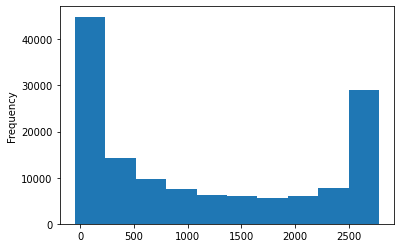

In [27]:
#target column histogram
df_train["Power(kW)"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

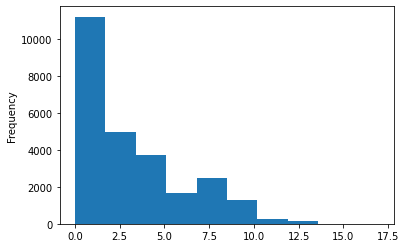

In [28]:
#wind power column histogram
weather["Ff"].plot.hist()

(array([17897., 17898., 17899., 17900., 17901., 17902., 17903., 17904.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

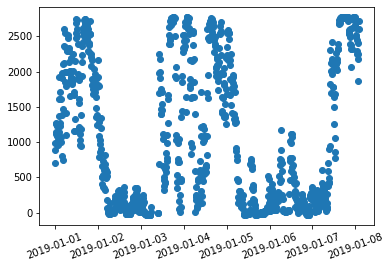

In [29]:
#time vs target col 
ig, ax = plt.subplots()
ax.scatter(df_train["Timestamp"][:1000], df_train["Power(kW)"][:1000])
plt.xticks(rotation=20)


In [30]:
#handling parsing datetime of train dataset
df_copy = df_train.copy()
df_copy['date'] = df_copy["Timestamp"]
df_copy['hour'] = df_copy['date'].dt.hour
df_copy['month'] = df_copy['date'].dt.month
df_copy['year'] = df_copy['date'].dt.year
df_copy['dayofmonth'] = df_copy['date'].dt.day

dates = df_copy[['hour','month','year','dayofmonth']]

df_train = pd.concat([df_train.drop(["Timestamp"],axis=1), dates], axis=1)
df_train

,Gearbox_T1_High_Speed_Shaft_Temperature,Gearbox_T3_High_Speed_Shaft_Temperature,Gearbox_T1_Intermediate_Speed_Shaft_Temperature,Temperature Gearbox Bearing Hollow Shaft,Tower Acceleration Normal,Gearbox_Oil-2_Temperature,Tower Acceleration Lateral,Temperature Bearing_A,Temperature Trafo-3,Gearbox_T3_Intermediate_Speed_Shaft_Temperature,...,Moment Q Direction,Moment Q Filltered,Proxy Sensor_Degree-45,Turbine State,Proxy Sensor_Degree-315,Power(kW),hour,month,year,dayofmonth
0,57.000000,59.000000,52.000000,56.158333,47.053776,57.000000,18.890772,35.000000,48.576668,56.158333,...,37.867054,39.281124,5.732657,1.0,5.779913,705.876648,0,1,2019,1
1,57.693333,59.485001,52.450001,57.000000,64.969742,57.413334,28.560265,35.233334,48.000000,57.000000,...,-90.169106,-89.018669,5.813177,1.0,5.796757,884.711670,0,1,2019,1
2,59.000000,60.756668,53.536667,57.775002,51.149670,58.728333,34.228813,36.000000,48.053333,57.775002,...,-88.556343,-88.422020,5.786413,1.0,5.772958,982.875000,0,1,2019,1
3,59.881668,61.563332,54.413334,58.683334,58.740929,59.518333,35.593220,36.000000,48.788334,58.683334,...,-123.755341,-124.858444,5.758913,1.0,5.728393,1115.943359,0,1,2019,1
4,61.290001,62.586666,55.485001,59.623333,53.264774,60.665001,38.552731,36.000000,49.000000,59.623333,...,-142.533325,-142.053543,5.724591,1.0,5.687730,1263.841675,0,1,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136725,61.000000,63.000000,56.041668,58.000000,153.287247,60.000000,69.762711,49.000000,121.000000,58.000000,...,-32.086143,-31.424229,5.745283,1.0,5.745321,2757.728271,23,8,2021,14
136726,61.000000,62.393333,56.000000,58.000000,155.118393,60.000000,82.937195,49.000000,121.000000,58.000000,...,-23.889460,-22.231714,5.746785,1.0,5.750756,2758.323242,23,8,2021,14
136727,61.000000,62.000000,56.000000,58.000000,156.138977,60.000000,74.502060,49.000000,121.000000,58.000000,...,-4.717197,-5.553182,5.748488,1.0,5.761683,2759.243408,23,8,2021,14
136728,61.000000,62.000000,56.000000,58.000000,143.470795,60.000000,81.649567,49.000000,121.000000,58.000000,...,-7.466090,-10.808114,5.760780,1.0,5.772737,2761.261719,23,8,2021,14


In [31]:
#merge features with weather data based on date
df_train=df_train.merge(weather,on=['hour','dayofmonth','month','year'],how='left')
df_train 

,Gearbox_T1_High_Speed_Shaft_Temperature,Gearbox_T3_High_Speed_Shaft_Temperature,Gearbox_T1_Intermediate_Speed_Shaft_Temperature,Temperature Gearbox Bearing Hollow Shaft,Tower Acceleration Normal,Gearbox_Oil-2_Temperature,Tower Acceleration Lateral,Temperature Bearing_A,Temperature Trafo-3,Gearbox_T3_Intermediate_Speed_Shaft_Temperature,...,DD_Rüzgar güneybatıdan esiyor,DD_Rüzgar güneyden esiyor,DD_Rüzgar güneydoğudan esiyor,DD_Rüzgar kuzey-kuzeybatı yönünden esiyor,DD_Rüzgar kuzey-kuzeydoğu yönünden esiyor,DD_Rüzgar kuzeybatıdan esiyor,DD_Rüzgar kuzeyden esiyor,DD_Rüzgar kuzeydoğudan esiyor,"DD_Rüzgarsız, durgun",Ff
0,57.000000,59.000000,52.000000,56.158333,47.053776,57.000000,18.890772,35.000000,48.576668,56.158333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,57.693333,59.485001,52.450001,57.000000,64.969742,57.413334,28.560265,35.233334,48.000000,57.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,59.000000,60.756668,53.536667,57.775002,51.149670,58.728333,34.228813,36.000000,48.053333,57.775002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,59.881668,61.563332,54.413334,58.683334,58.740929,59.518333,35.593220,36.000000,48.788334,58.683334,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,61.290001,62.586666,55.485001,59.623333,53.264774,60.665001,38.552731,36.000000,49.000000,59.623333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136725,61.000000,63.000000,56.041668,58.000000,153.287247,60.000000,69.762711,49.000000,121.000000,58.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0
136726,61.000000,62.393333,56.000000,58.000000,155.118393,60.000000,82.937195,49.000000,121.000000,58.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0
136727,61.000000,62.000000,56.000000,58.000000,156.138977,60.000000,74.502060,49.000000,121.000000,58.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0
136728,61.000000,62.000000,56.000000,58.000000,143.470795,60.000000,81.649567,49.000000,121.000000,58.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0


In [32]:
#fill NaNs with median
df_train = df_train.fillna(df_train.median())
df_train.isnull().sum().sort_values()

Gearbox_T1_High_Speed_Shaft_Temperature    0
Moment Q Filltered                         0
Moment Q Direction                         0
Blade-3 Set Value_Degree                   0
Blade-1 Set Value_Degree                   0
                                          ..
Temperature Axis Box-2                     0
Voltage C-N                                0
Temperature Axis Box-3                     0
Hydraulic Prepressure                      0
Ff                                         0
Length: 100, dtype: int64

In [33]:
#pivot table
pivot = df_train.pivot_table(index = "Ff",
                         values = ["Power(kW)"],
                         aggfunc=np.mean)
pivot

,Power(kW)
Ff,
0.0,646.831022
1.0,741.178101
2.0,867.373543
3.0,1184.181343
4.0,1374.308978
5.0,1576.047143
6.0,1721.154649
7.0,1854.251725
8.0,2007.353819


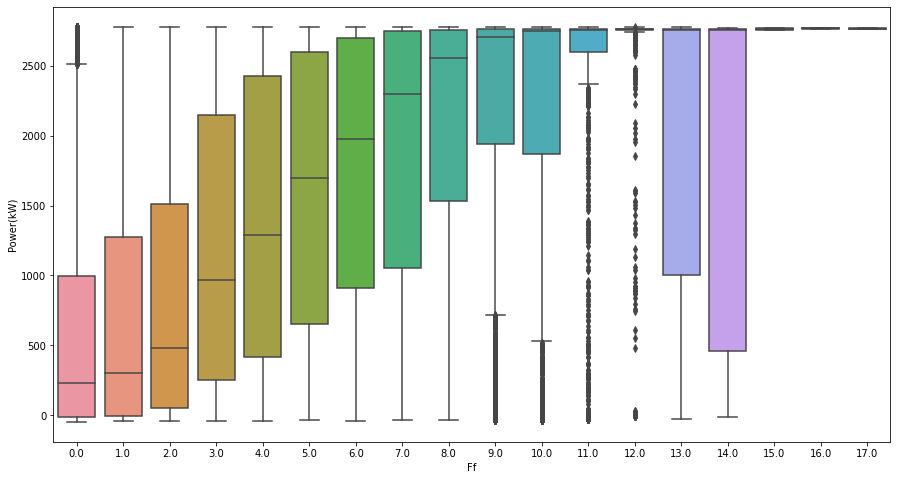

In [34]:
#boxplot of wind speed with power
plt.figure(figsize=(15,8))
ax = sns.boxplot( x=df_train["Ff"], y=df_train["Power(kW)"],showfliers=True)


In [35]:
#powerwinddf = df_train.loc[:, ["Ff","Power(kW)"]]

#from sklearn.ensemble import IsolationForest
#iso = IsolationForest(contamination=0.1)

#yhat = iso.fit_predict(powerwinddf)
#mask = yhat != -1
#powerwinddf= powerwinddf[mask]

#df_train.drop(["Ff","Power(kW)"],axis=1,inplace=True)

In [36]:
#plt.figure(figsize=(15,8))
#ax = sns.boxplot( x=powerwinddf["Ff"], y=powerwinddf["Power(kW)"],showfliers=True)

In [37]:
#df_train = df_train.join(powerwinddf, how='outer')
#df_train

In [38]:
#theorotiacal curve data from https://en.wind-turbine-models.com/turbines/747-ge-general-electric-ge-2.75-103#datasheet
conditions = [
    (df_train['Ff'] == 0),
    (df_train['Ff'] == 1),
    (df_train['Ff'] == 2),
    (df_train['Ff'] == 3),
    (df_train['Ff'] == 4),
    (df_train['Ff'] == 5),
    (df_train['Ff'] == 6),
    (df_train['Ff'] == 7),
    (df_train['Ff'] == 8),
    (df_train['Ff'] == 9),
    (df_train['Ff'] == 10),
    (df_train['Ff'] == 11),
    (df_train['Ff'] == 12),
    (df_train['Ff'] == 13),
    (df_train['Ff'] == 14),
    (df_train['Ff'] == 15),
    (df_train['Ff'] == 16),
    (df_train['Ff'] == 17)
    ]
values = [0, 0, 0, 17, 104, 251, 470, 772, 1170, 1656, 2120,
         2441, 2661, 2768, 2780, 2780, 2780, 2780]
df_train['theoretical(kW)'] = np.select(conditions, values)
df_train.head()

,Gearbox_T1_High_Speed_Shaft_Temperature,Gearbox_T3_High_Speed_Shaft_Temperature,Gearbox_T1_Intermediate_Speed_Shaft_Temperature,Temperature Gearbox Bearing Hollow Shaft,Tower Acceleration Normal,Gearbox_Oil-2_Temperature,Tower Acceleration Lateral,Temperature Bearing_A,Temperature Trafo-3,Gearbox_T3_Intermediate_Speed_Shaft_Temperature,...,DD_Rüzgar güneyden esiyor,DD_Rüzgar güneydoğudan esiyor,DD_Rüzgar kuzey-kuzeybatı yönünden esiyor,DD_Rüzgar kuzey-kuzeydoğu yönünden esiyor,DD_Rüzgar kuzeybatıdan esiyor,DD_Rüzgar kuzeyden esiyor,DD_Rüzgar kuzeydoğudan esiyor,"DD_Rüzgarsız, durgun",Ff,theoretical(kW)
0,57.000000,59.000000,52.000000,56.158333,47.053776,57.000000,18.890772,35.000000,48.576668,56.158333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,57.693333,59.485001,52.450001,57.000000,64.969742,57.413334,28.560265,35.233334,48.000000,57.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,59.000000,60.756668,53.536667,57.775002,51.149670,58.728333,34.228813,36.000000,48.053333,57.775002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,59.881668,61.563332,54.413334,58.683334,58.740929,59.518333,35.593220,36.000000,48.788334,58.683334,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,61.290001,62.586666,55.485001,59.623333,53.264774,60.665001,38.552731,36.000000,49.000000,59.623333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


<AxesSubplot:>

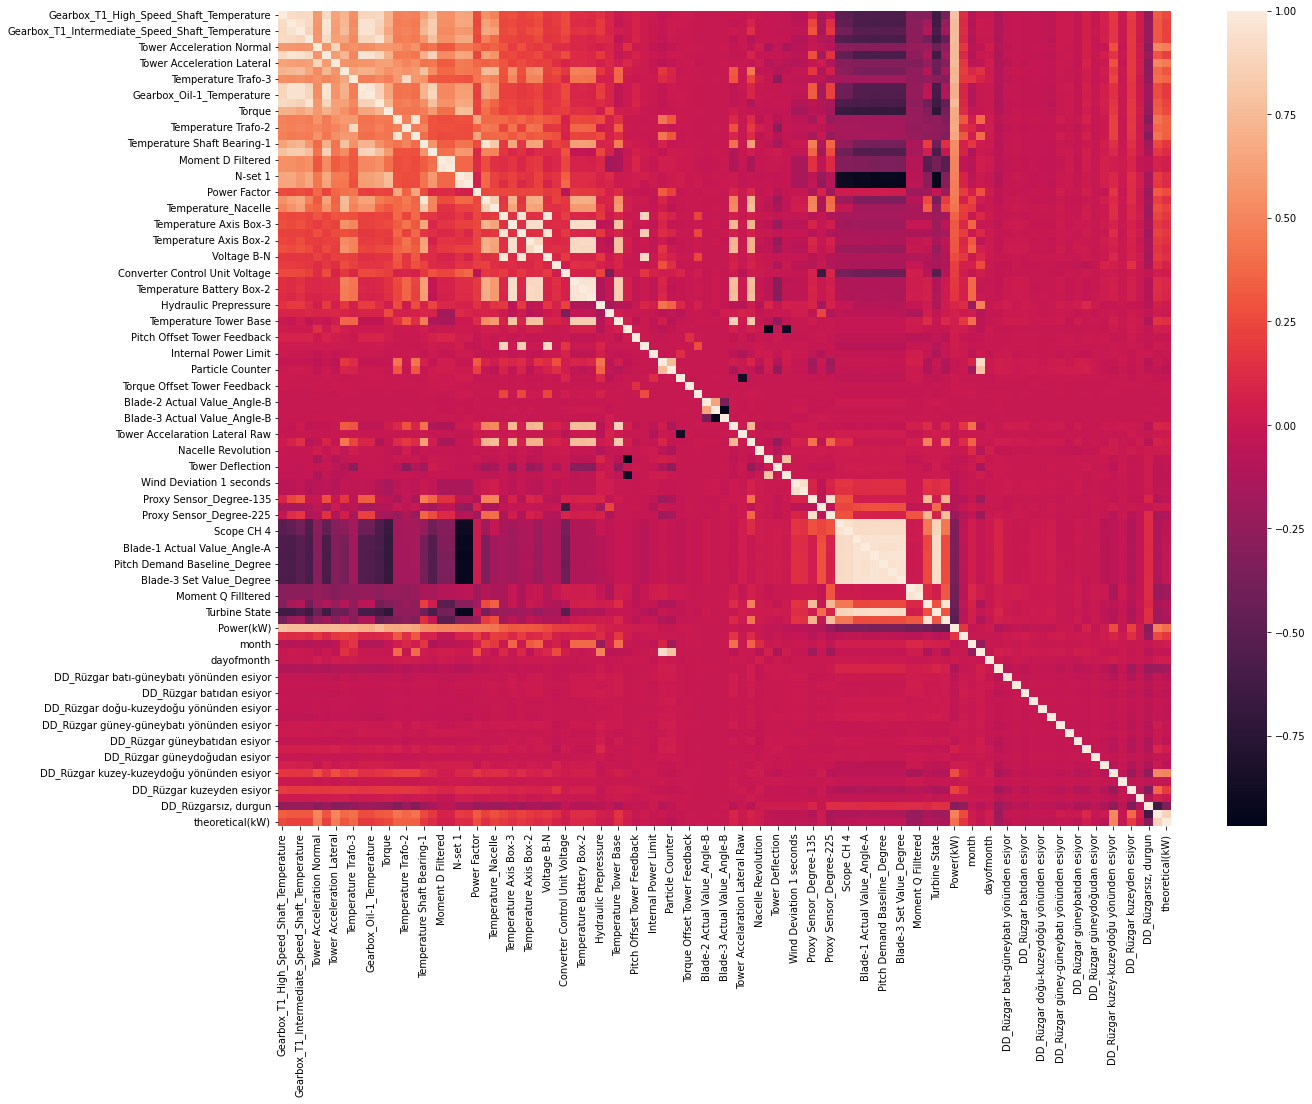

In [39]:
#correlation matrix
corrdata = df_train.corr()
ax,fig = plt.subplots(figsize=(20,15))
sns.heatmap(corrdata)

In [40]:
#correlation with target col
for index, value in df_train.corrwith(df_train["Power(kW)"]).abs().sort_values(ascending=False).items():

    print(index,value)

Power(kW) 0.9999999999999998
Gearbox_T1_High_Speed_Shaft_Temperature 0.7893973698754406
Temperature Gearbox Bearing Hollow Shaft 0.7594972542600222
Gearbox_T3_High_Speed_Shaft_Temperature 0.7572774525491944
Gearbox_T1_Intermediate_Speed_Shaft_Temperature 0.7544713299471714
Gearbox_Oil_Temperature 0.7497162238889951
Tower Acceleration Lateral 0.7490703070944129
Tower Acceleration Normal 0.7447093950031904
Gearbox_Oil-2_Temperature 0.7390658020743811
Temperature Trafo-3 0.733971883695635
Temperature Bearing_A 0.7195231429930463
Gearbox_T3_Intermediate_Speed_Shaft_Temperature 0.6943059229994166
Gearbox_Oil-1_Temperature 0.6864446351147736
Temperature Trafo-2 0.6732852455205468
Torque 0.670679162601583
Converter Control Unit Reactive Power 0.6620179046831696
Reactive Power 0.6486808764971139
Temperature Shaft Bearing-1 0.5346232362227409
Gearbox_Distributor_Temperature 0.5174844250973021
Proxy Sensor_Degree-315 0.4984134905850177
Moment D Direction 0.49463009869374
Moment D Filtered 0.4942

In [41]:
#df_train = df_train.apply(lambda x: x.fillna(x.value_counts().index[0]))
#df_train.isnull().sum().sort_values()

Handling test dataset

In [42]:
df_test.isnull().sum().sort_values()

Timestamp                                     0
Proxy Sensor_Degree-135                     301
Circuit Breaker cut-ins                     351
Gearbox_T3_High_Speed_Shaft_Temperature     375
Line Frequency                              380
                                           ... 
Temperature Shaft Bearing-1                 919
Nacelle Revolution                          927
Proxy Sensor_Degree-315                     930
Scope CH 4                                  950
Moment D Direction                         1100
Length: 77, dtype: int64

In [43]:
df_copy = df_test.copy()
df_copy['date'] = df_copy["Timestamp"]
df_copy['hour'] = df_copy['date'].dt.hour
df_copy['month'] = df_copy['date'].dt.month
df_copy['year'] = df_copy['date'].dt.year
df_copy['dayofmonth'] = df_copy['date'].dt.day

dates = df_copy[['hour','month','year','dayofmonth']]

df_test = pd.concat([df_test.drop(["Timestamp"],axis=1), dates], axis=1)
df_test

,Gearbox_T1_High_Speed_Shaft_Temperature,Gearbox_T3_High_Speed_Shaft_Temperature,Gearbox_T1_Intermediate_Speed_Shaft_Temperature,Temperature Gearbox Bearing Hollow Shaft,Tower Acceleration Normal,Gearbox_Oil-2_Temperature,Tower Acceleration Lateral,Temperature Bearing_A,Temperature Trafo-3,Gearbox_T3_Intermediate_Speed_Shaft_Temperature,...,Blade-3 Set Value_Degree,Moment Q Direction,Moment Q Filltered,Proxy Sensor_Degree-45,Turbine State,Proxy Sensor_Degree-315,hour,month,year,dayofmonth
136730,60.068333,62.0,56.000000,58.000000,125.218666,60.000000,64.707336,54.348331,121.000000,58.000000,...,8.266594,-41.861877,-37.917656,5.739297,1.0,5.734730,0,8,2021,15
136731,60.000000,62.0,56.000000,57.036667,145.160309,59.279999,64.127480,58.098331,120.971664,57.036667,...,6.287027,-19.210815,-19.602339,5.720869,1.0,5.726634,0,8,2021,15
136732,60.000000,62.0,55.853333,57.000000,129.239914,59.000000,54.563091,60.360001,120.028336,57.000000,...,6.844808,-28.144068,-34.329105,5.727475,1.0,5.728649,0,8,2021,15
136733,60.000000,62.0,55.000000,57.000000,140.151611,59.000000,61.899250,61.715000,120.000000,57.000000,...,6.909220,-7.592476,-11.718444,5.728980,1.0,5.739824,0,8,2021,15
136734,60.000000,62.0,55.000000,57.000000,126.124702,59.000000,56.804501,62.698334,120.000000,57.000000,...,8.313858,-7.760864,-9.863355,5.736651,1.0,5.747692,0,8,2021,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154257,65.811668,NaN,59.945000,62.808334,225.038239,65.300003,109.889709,61.000000,97.000000,62.808334,...,14.540556,-29.340843,-27.513502,5.746916,1.0,5.756082,23,12,2021,14
154258,68.586670,NaN,62.084999,65.413330,229.905838,67.871666,106.016670,61.116665,97.000000,65.413330,...,15.207320,-31.925669,-30.197918,5.749150,1.0,5.755406,23,12,2021,14
154259,63.746666,NaN,59.965000,64.051666,223.352631,64.461670,111.690208,61.293335,97.000000,64.050003,...,14.064686,-53.071564,-48.306511,5.751807,1.0,5.747936,23,12,2021,14
154260,66.643333,NaN,60.678333,63.421665,227.704514,66.081665,119.716499,60.786667,97.000000,63.421665,...,15.230121,-28.747763,-23.844364,5.747686,1.0,5.757787,23,12,2021,14


In [44]:
df_test=df_test.merge(weather,on=['hour','dayofmonth','month','year'],how='left')
df_test 

,Gearbox_T1_High_Speed_Shaft_Temperature,Gearbox_T3_High_Speed_Shaft_Temperature,Gearbox_T1_Intermediate_Speed_Shaft_Temperature,Temperature Gearbox Bearing Hollow Shaft,Tower Acceleration Normal,Gearbox_Oil-2_Temperature,Tower Acceleration Lateral,Temperature Bearing_A,Temperature Trafo-3,Gearbox_T3_Intermediate_Speed_Shaft_Temperature,...,DD_Rüzgar güneybatıdan esiyor,DD_Rüzgar güneyden esiyor,DD_Rüzgar güneydoğudan esiyor,DD_Rüzgar kuzey-kuzeybatı yönünden esiyor,DD_Rüzgar kuzey-kuzeydoğu yönünden esiyor,DD_Rüzgar kuzeybatıdan esiyor,DD_Rüzgar kuzeyden esiyor,DD_Rüzgar kuzeydoğudan esiyor,"DD_Rüzgarsız, durgun",Ff
0,60.068333,62.0,56.000000,58.000000,125.218666,60.000000,64.707336,54.348331,121.000000,58.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0
1,60.000000,62.0,56.000000,57.036667,145.160309,59.279999,64.127480,58.098331,120.971664,57.036667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0
2,60.000000,62.0,55.853333,57.000000,129.239914,59.000000,54.563091,60.360001,120.028336,57.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0
3,60.000000,62.0,55.000000,57.000000,140.151611,59.000000,61.899250,61.715000,120.000000,57.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0
4,60.000000,62.0,55.000000,57.000000,126.124702,59.000000,56.804501,62.698334,120.000000,57.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17527,65.811668,NaN,59.945000,62.808334,225.038239,65.300003,109.889709,61.000000,97.000000,62.808334,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0
17528,68.586670,NaN,62.084999,65.413330,229.905838,67.871666,106.016670,61.116665,97.000000,65.413330,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0
17529,63.746666,NaN,59.965000,64.051666,223.352631,64.461670,111.690208,61.293335,97.000000,64.050003,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0
17530,66.643333,NaN,60.678333,63.421665,227.704514,66.081665,119.716499,60.786667,97.000000,63.421665,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0


In [45]:
# Fill numeric rows with the median
df_test = df_test.fillna(df_test.median())

In [46]:
#theorotiacal curve data from https://en.wind-turbine-models.com/turbines/747-ge-general-electric-ge-2.75-103#datasheet
conditions = [
    (df_test['Ff'] == 0),
    (df_test['Ff'] == 1),
    (df_test['Ff'] == 2),
    (df_test['Ff'] == 3),
    (df_test['Ff'] == 4),
    (df_test['Ff'] == 5),
    (df_test['Ff'] == 6),
    (df_test['Ff'] == 7),
    (df_test['Ff'] == 8),
    (df_test['Ff'] == 9),
    (df_test['Ff'] == 10),
    (df_test['Ff'] == 11),
    (df_test['Ff'] == 12),
    (df_test['Ff'] == 13),
    (df_test['Ff'] == 14),
    (df_test['Ff'] == 15),
    (df_test['Ff'] == 16),
    (df_test['Ff'] == 17)
    ]
values = [0, 0, 0, 17, 104, 251, 470, 772, 1170, 1656, 2120,
         2441, 2661, 2768, 2780, 2780, 2780, 2780]
df_test['theoretical(kW)'] = np.select(conditions, values)
df_test.head()

,Gearbox_T1_High_Speed_Shaft_Temperature,Gearbox_T3_High_Speed_Shaft_Temperature,Gearbox_T1_Intermediate_Speed_Shaft_Temperature,Temperature Gearbox Bearing Hollow Shaft,Tower Acceleration Normal,Gearbox_Oil-2_Temperature,Tower Acceleration Lateral,Temperature Bearing_A,Temperature Trafo-3,Gearbox_T3_Intermediate_Speed_Shaft_Temperature,...,DD_Rüzgar güneyden esiyor,DD_Rüzgar güneydoğudan esiyor,DD_Rüzgar kuzey-kuzeybatı yönünden esiyor,DD_Rüzgar kuzey-kuzeydoğu yönünden esiyor,DD_Rüzgar kuzeybatıdan esiyor,DD_Rüzgar kuzeyden esiyor,DD_Rüzgar kuzeydoğudan esiyor,"DD_Rüzgarsız, durgun",Ff,theoretical(kW)
0,60.068333,62.0,56.000000,58.000000,125.218666,60.000000,64.707336,54.348331,121.000000,58.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,251
1,60.000000,62.0,56.000000,57.036667,145.160309,59.279999,64.127480,58.098331,120.971664,57.036667,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,251
2,60.000000,62.0,55.853333,57.000000,129.239914,59.000000,54.563091,60.360001,120.028336,57.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,251
3,60.000000,62.0,55.000000,57.000000,140.151611,59.000000,61.899250,61.715000,120.000000,57.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,251
4,60.000000,62.0,55.000000,57.000000,126.124702,59.000000,56.804501,62.698334,120.000000,57.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,251


In [47]:
y = df_train["Power(kW)"]
X = df_train.drop(["Power(kW)"],axis=1)

Handling multicollinearity

In [48]:
#this function returns columns that have bigger corr than threshold
def correlation(df, threshold):
    correlated_cols = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]>threshold):
                corrname = corr_matrix.columns[i]
                correlated_cols.add(corrname)
    return correlated_cols

In [49]:
corr_drop = correlation(X,0.9)
corr_drop

{'Blade-1 Actual Value_Angle-A',
 'Blade-1 Set Value_Degree',
 'Blade-2 Actual Value_Angle-A',
 'Blade-2 Set Value_Degree',
 'Blade-3 Set Value_Degree',
 'Gearbox_Oil-1_Temperature',
 'Gearbox_Oil-2_Temperature',
 'Gearbox_Oil_Temperature',
 'Gearbox_T1_Intermediate_Speed_Shaft_Temperature',
 'Gearbox_T3_High_Speed_Shaft_Temperature',
 'Gearbox_T3_Intermediate_Speed_Shaft_Temperature',
 'Line Frequency',
 'Moment D Direction',
 'Moment Q Filltered',
 'Operating State',
 'Pitch Demand Baseline_Degree',
 'Proxy Sensor_Degree-225',
 'Proxy Sensor_Degree-315',
 'Reactive Power',
 'Scope CH 4',
 'Temperature Axis Box-1',
 'Temperature Axis Box-2',
 'Temperature Battery Box-1',
 'Temperature Battery Box-2',
 'Temperature Battery Box-3',
 'Temperature Gearbox Bearing Hollow Shaft',
 'Temperature Shaft Bearing-2',
 'Temperature Trafo-2',
 'Turbine State',
 'Voltage B-N',
 'Voltage C-N',
 'Wind Deviation 10 seconds',
 'year'}

In [50]:
#drop highly correlated independent cols
X.drop(labels = corr_drop,axis=1,inplace=True)
df_test.drop(labels = corr_drop,axis=1,inplace=True)

<AxesSubplot:>

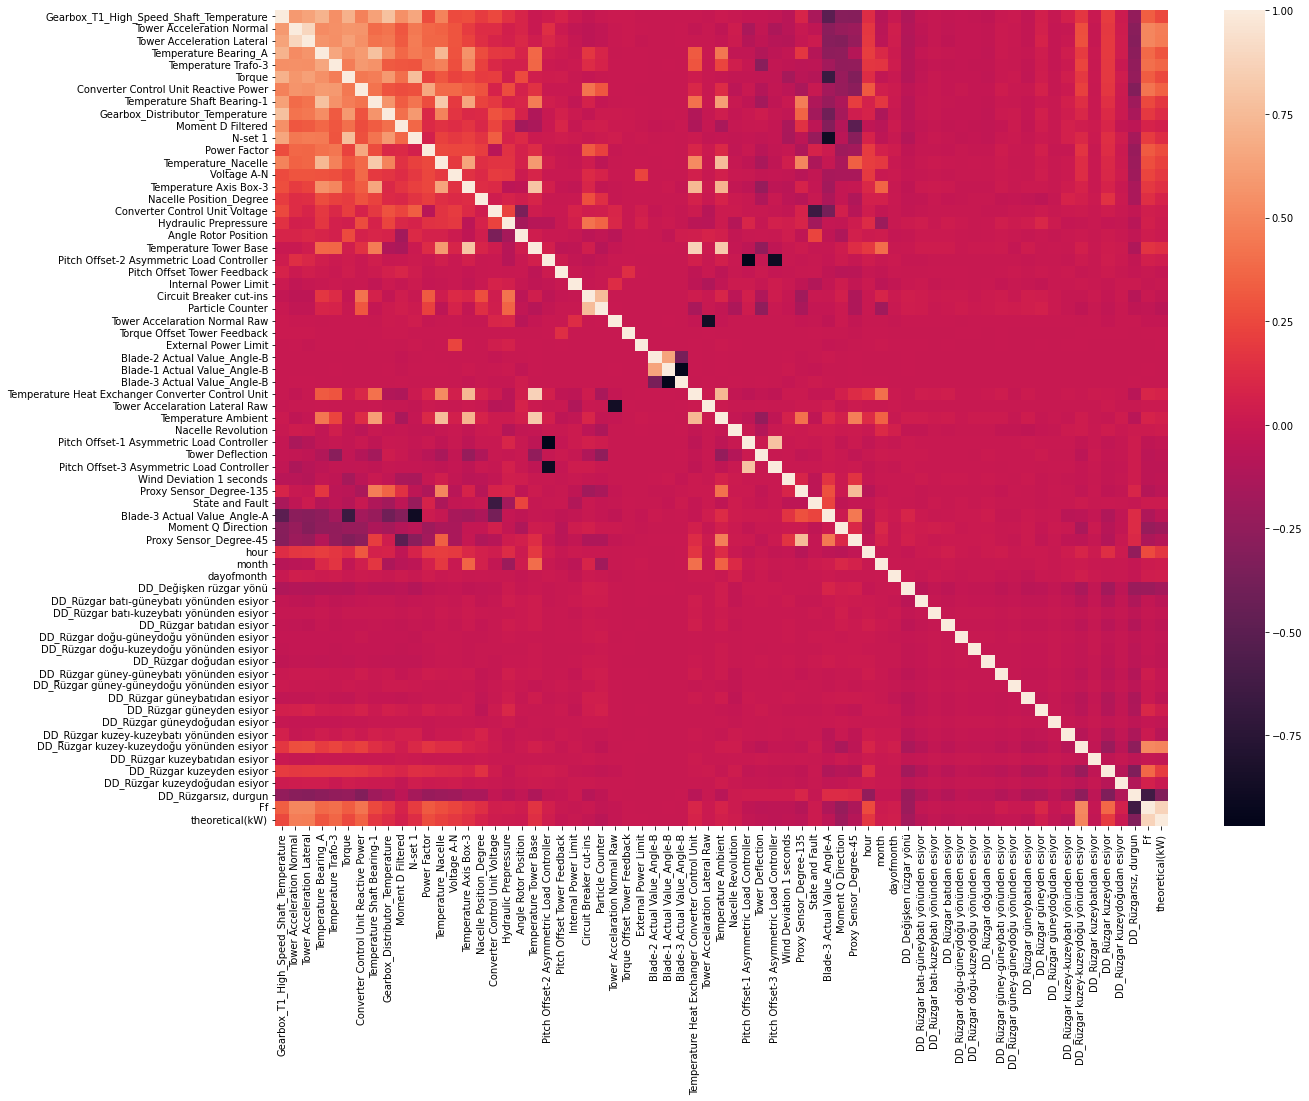

In [51]:
#correlation matrix
corrdata = X.corr()
ax,fig = plt.subplots(figsize=(20,15))
sns.heatmap(corrdata)

In [52]:
#corr with target after handling multicollinearity
for index, value in X.corrwith(y).abs().sort_values(ascending=False).items():

    print(index,value)

Gearbox_T1_High_Speed_Shaft_Temperature 0.7893973698754406
Tower Acceleration Lateral 0.7490703070944129
Tower Acceleration Normal 0.7447093950031904
Temperature Trafo-3 0.733971883695635
Temperature Bearing_A 0.7195231429930463
Torque 0.670679162601583
Converter Control Unit Reactive Power 0.6620179046831696
Temperature Shaft Bearing-1 0.5346232362227409
Gearbox_Distributor_Temperature 0.5174844250973021
Moment D Filtered 0.4942247489582601
N-set 1 0.4813420487527079
Ff 0.480069007634977
Power Factor 0.46428912216186036
Temperature_Nacelle 0.4259003079660174
Proxy Sensor_Degree-45 0.41409201759528075
theoretical(kW) 0.4018377075410701
Moment Q Direction 0.40058561312137947
Voltage A-N 0.3512081548512892
Blade-3 Actual Value_Angle-A 0.32879225867904355
Temperature Axis Box-3 0.3124900362502672
DD_Rüzgarsız, durgun 0.29634742826104565
DD_Rüzgar kuzey-kuzeydoğu yönünden esiyor 0.26575747248890086
DD_Rüzgar kuzeyden esiyor 0.22614028926483082
Nacelle Position_Degree 0.20559214770969753
Co

In [53]:
"""
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)
df_test = min_max_scaler.fit_transform(df_test)
"""

'\nfrom sklearn.preprocessing import MinMaxScaler\nmin_max_scaler = MinMaxScaler()\nX = min_max_scaler.fit_transform(X)\ndf_test = min_max_scaler.fit_transform(df_test)\n'

In [54]:
#feature selection 25 cols
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
fs = SelectKBest(score_func=f_regression, k=25)
z = fs.fit_transform(X, y)
print("After selecting best features:", z.shape) 


After selecting best features: (136730, 25)


In [55]:
filter = fs.get_support()
features = np.array(X.columns)
 
print("Selected best 25:")
print(features[filter])


Selected best 25:
['Gearbox_T1_High_Speed_Shaft_Temperature' 'Tower Acceleration Normal'
 'Tower Acceleration Lateral' 'Temperature Bearing_A'
 'Temperature Trafo-3' 'Torque' 'Converter Control Unit Reactive Power'
 'Temperature Shaft Bearing-1' 'Gearbox_Distributor_Temperature'
 'Moment D Filtered' 'N-set 1' 'Power Factor' 'Temperature_Nacelle'
 'Voltage A-N' 'Temperature Axis Box-3' 'Nacelle Position_Degree'
 'Converter Control Unit Voltage' 'Blade-3 Actual Value_Angle-A'
 'Moment Q Direction' 'Proxy Sensor_Degree-45'
 'DD_Rüzgar kuzey-kuzeydoğu yönünden esiyor' 'DD_Rüzgar kuzeyden esiyor'
 'DD_Rüzgarsız, durgun' 'Ff' 'theoretical(kW)']


In [56]:
X_fea = X[features[filter]]
df_test = df_test[features[filter]]
df_test

,Gearbox_T1_High_Speed_Shaft_Temperature,Tower Acceleration Normal,Tower Acceleration Lateral,Temperature Bearing_A,Temperature Trafo-3,Torque,Converter Control Unit Reactive Power,Temperature Shaft Bearing-1,Gearbox_Distributor_Temperature,Moment D Filtered,...,Nacelle Position_Degree,Converter Control Unit Voltage,Blade-3 Actual Value_Angle-A,Moment Q Direction,Proxy Sensor_Degree-45,DD_Rüzgar kuzey-kuzeydoğu yönünden esiyor,DD_Rüzgar kuzeyden esiyor,"DD_Rüzgarsız, durgun",Ff,theoretical(kW)
0,60.068333,125.218666,64.707336,54.348331,121.000000,100.958351,567.088318,48.0,47.000000,261.222717,...,342.428345,702.284973,8.269771,-41.861877,5.739297,1.0,0.0,0.0,5.0,251
1,60.000000,145.160309,64.127480,58.098331,120.971664,100.329117,324.888336,48.0,47.000000,270.871674,...,342.000000,697.951660,6.293597,-19.210815,5.720869,1.0,0.0,0.0,5.0,251
2,60.000000,129.239914,54.563091,60.360001,120.028336,100.444016,361.404999,48.0,46.900002,264.673279,...,342.000000,698.746643,6.841763,-28.144068,5.727475,1.0,0.0,0.0,5.0,251
3,60.000000,140.151611,61.899250,61.715000,120.000000,100.590530,361.053345,48.0,46.285000,244.336014,...,344.299988,698.826660,6.902684,-7.592476,5.728980,1.0,0.0,0.0,5.0,251
4,60.000000,126.124702,56.804501,62.698334,120.000000,101.075531,341.214996,48.0,46.463333,243.551773,...,343.000000,698.376648,8.315566,-7.760864,5.736651,1.0,0.0,0.0,5.0,251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17527,65.811668,225.038239,109.889709,61.000000,97.000000,101.008583,492.868347,39.0,58.430000,231.628342,...,329.000000,702.093323,14.539557,-29.340843,5.746916,1.0,0.0,0.0,8.0,1170
17528,68.586670,229.905838,106.016670,61.116665,97.000000,101.010620,507.186676,39.0,60.884998,242.656570,...,329.301666,702.219971,15.214368,-31.925669,5.749150,1.0,0.0,0.0,8.0,1170
17529,63.746666,223.352631,111.690208,61.293335,97.000000,101.001549,565.905029,39.0,49.294998,244.664932,...,332.929993,703.005005,14.061195,-53.071564,5.751807,1.0,0.0,0.0,8.0,1170
17530,66.643333,227.704514,119.716499,60.786667,97.000000,101.049232,564.746643,39.0,59.645000,243.133423,...,329.518341,703.066650,15.230316,-28.747763,5.747686,1.0,0.0,0.0,8.0,1170


In [57]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [58]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.kernel_ridge import KernelRidge
#from sklearn import linear_model
#import xgboost as xgb
#import lightgbm as lgb
"""
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
"""
rf = RandomForestRegressor(n_estimators=1000,max_depth=6)
rf.fit(X_fea,y)


RandomForestRegressor(max_depth=6, n_estimators=1000)

In [59]:
"""
rf_model = RandomForestRegressor(n_estimators=10)

rf_model.fit(X_train,y_train)
pred = rf_model.predict(X_test)

rfscore = rf_model.score(X_test,y_test)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
crvlsc = cross_val_score(rf_model, X, y, cv=kf)                 

print('Random Forest')
print('*******************')
print('Testscore')
print('---------')
print(rfscore)
print('\n')
print('\n')
print('Cross Validation Scores')
print('---------------------')
print(f'Min:{crvlsc.min()}')
print(f'Max:{crvlsc.max()}') 
print(f'Avg:{crvlsc.mean()}\n')
"""

"\nrf_model = RandomForestRegressor(n_estimators=10)\n\nrf_model.fit(X_train,y_train)\npred = rf_model.predict(X_test)\n\nrfscore = rf_model.score(X_test,y_test)\nkf = KFold(n_splits=5, shuffle=True, random_state=42)\ncrvlsc = cross_val_score(rf_model, X, y, cv=kf)                 \n\nprint('Random Forest')\nprint('*******************')\nprint('Testscore')\nprint('---------')\nprint(rfscore)\nprint('\n')\nprint('\n')\nprint('Cross Validation Scores')\nprint('---------------------')\nprint(f'Min:{crvlsc.min()}')\nprint(f'Max:{crvlsc.max()}') \nprint(f'Avg:{crvlsc.mean()}\n')\n"

In [60]:
"""
kf = KFold(n_splits=10, shuffle=True, random_state=1)
score_list = []
test_preds = []
i = 1
for train_index, val_index in kf.split(X):
    print(f'Fold {i}')
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    y_pred = rf1000.predict(X_val)
    rmse_score = np.sqrt(mean_squared_error(y_val, y_pred))
    print(f"{i}.eğitim rmse hatası:{rmse_score}")
    score_list.append(rmse_score)
    y_test = rf1000.predict(test)
    test_preds.append(y_test)
    i += 1

print(score_list)
print("RMSE Score: ", np.mean(score_list))
"""

'\nkf = KFold(n_splits=10, shuffle=True, random_state=1)\nscore_list = []\ntest_preds = []\ni = 1\nfor train_index, val_index in kf.split(X):\n    print(f\'Fold {i}\')\n    X_train, X_val = X.iloc[train_index], X.iloc[val_index]\n    y_train, y_val = y.iloc[train_index], y.iloc[val_index]\n    \n    y_pred = rf1000.predict(X_val)\n    rmse_score = np.sqrt(mean_squared_error(y_val, y_pred))\n    print(f"{i}.eğitim rmse hatası:{rmse_score}")\n    score_list.append(rmse_score)\n    y_test = rf1000.predict(test)\n    test_preds.append(y_test)\n    i += 1\n\nprint(score_list)\nprint("RMSE Score: ", np.mean(score_list))\n'

In [61]:
predictions = rf.predict(df_test)

In [62]:
submission = pd.read_csv('../input/enerjisa-uretim-hackathon/sample_submission.csv')
submission['Power(kW)'] = predictions
submission.to_csv('submission.csv', index=False)